In [1]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import numpy as np
%matplotlib inline 
from matplotlib import pyplot as plt
from Bio import SeqIO
import customfunc
import matrix

In [2]:
#!abricate ~/documentos/sentinel/genomasbrasil/*.gbff --db argannot --noheader --threads 12 > ~/documentos/github/ARG-Sentinel/spreadsheets/argannot_br.csv

In [3]:
#!abricate ~/documentos/sentinel/genomasbrasil/*.gbff --db plasmidfinder --noheader --threads 12 > ~/documentos/github/ARG-Sentinel/spreadsheets/plasmidfinder_br.csv

## **LOAD DATAFRAMES**
<p style='text-align: justify;'>
<b>Catálogo:</b>  registo dos genomas brasileiros baixados do NCBI. Contem informações quanto a local, data e fonte de coleta, hospedeiro, especies (e cepa) e presenta de plasmídeo <br />
<b>ARG-Annot:</b> ARGs encontrados via consulta do ARG-Annot <br />
<b>Plasmidfinder</b> Genes de plasmídeos encontrados via consulta no plasmidfinder
</p>

In [4]:
catalogo_bacterias_br = pd.read_csv("~/documentos/github/ARG-Sentinel/spreadsheets/catalogo_teste.csv")
catalog.head()

,accession,colection_date,host,source,coord,country,organism,strain,plasmid
0,GCF_002113285.1_ASM211328v1_genomic.gbff,May-2014,Na,bulk soil from sugarcane field,22.7 S 47.6 W,Brazil,Pseudomonas sp. B11(2017),B11(2017),Na
1,GCA_004369765.1_ASM436976v1_genomic.gbff,Mar-2017,Oreochromis niloticus,brain,Na,Brazil,Streptococcus agalactiae,SA22AQUAVET,Na
2,GCA_001267925.1_ASM126792v1_genomic.gbff,2006,wheat root,surface-sterilized wheat roots,Na,"Germany: Oberpfalz, Neumarkt",Herbaspirillum hiltneri N3,N3,Na
3,GCA_007097455.1_ASM709745v1_genomic.gbff,2011,Homo sapiens,urine,Na,Brazil,Corynebacterium aurimucosum,2271,Na
4,GCF_002029925.1_ASM202992v1_genomic.gbff,Feb-2017,Canis lupus familiaris,ear,23.954 S 46.3355 W,Brazil: Sao Paulo,Pseudomonas aeruginosa,ICBDVIM-2,Na


In [5]:
#ARG-Annot database genes
argannot = pd.read_csv("~/documentos/github/ARG-Sentinel/spreadsheets/argannot_i50_br.csv", sep = '\t', names = ['file','sequence','start','end','strand','gene','coverage','coverage_map','gaps','coverage_pec','identity_perc','database','accession','product','resistance'])
argannot['file'] = argannot['file'].apply(lambda x: x.split('/')[-1])
argannot = customfunc.filldf(argannot,catalog)
argannot.reset_index(inplace = True)
argannot.head()

,file,sequence,start,end,strand,gene,coverage,coverage_map,gaps,coverage_pec,...,product,resistance,colection_date,host,source,coordenates,country,organism,strain,plasmid
0,GCA_000007045.1_ASM704v1_genomic.gbff,AE007317,332863,335022,-,(Bla)PBP1a,1-2160/2160,========/======,2/2,99.95,...,(Bla)PBP1a,NaN,Na,Na,Na,Na,Na,Streptococcus pneumoniae R6,R6,Na
1,GCA_000007045.1_ASM704v1_genomic.gbff,AE007317,1886036,1888501,-,(Bla)PBP1b,1-2466/2466,===============,0/0,100.00,...,(Bla)PBP1b,NaN,Na,Na,Na,Na,Na,Streptococcus pneumoniae R6,R6,Na
2,GCA_000195475.2_ASM19547v2_genomic.gbff,AEQS01000090,8759,9863,-,(Tet)tet(35),1-1105/1110,===============,0/0,99.55,...,(Tet)tet(35),NaN,Na,Na,diseased coral,Na,Na,Vibrio coralliilyticus P1,P1,Na
3,GCA_000195475.2_ASM19547v2_genomic.gbff,AEQS01000199,25156,25620,+,(Tet)tet(34),1-465/465,===============,0/0,100.00,...,(Tet)tet(34),NaN,Na,Na,diseased coral,Na,Na,Vibrio coralliilyticus P1,P1,Na
4,GCA_000223095.2_ASM22309v2_genomic.gbff,AFSV01000001,412751,413214,-,(Tet)tet(34),1-464/465,========/======,4/8,98.92,...,(Tet)tet(34),NaN,Na,Homo sapiens,patient with cholera-like diarrhea,Na,Na,Vibrio cholerae O1 str. Amazonia,Amazonia,Na


In [6]:
len(argannot)

4550

In [7]:
#CARD database genes
card = pd.read_csv("~/documentos/github/ARG-Sentinel/spreadsheets/card_br.csv", sep = '\t', names = ['file','sequence','start','end','strand','gene','coverage','coverage_map','gaps','coverage_pec','identity_perc','database','accession','product','resistance'])
card['file'] = card['file'].apply(lambda x: x.split('/')[-1])
card = customfunc.filldf(card,catalog)
card.reset_index(inplace = True)
card.head()

,file,sequence,start,end,strand,gene,coverage,coverage_map,gaps,coverage_pec,...,product,resistance,colection_date,host,source,coordenates,country,organism,strain,plasmid
0,GCA_000007045.1_ASM704v1_genomic.gbff,AE007317,866211,867410,+,pmrA,1-1200/1200,===============,0/0,100.0,...,PmrA is a MFS-type efflux pump expressed in St...,fluoroquinolone,Na,Na,Na,Na,Na,Streptococcus pneumoniae R6,R6,Na
1,GCA_000007045.1_ASM704v1_genomic.gbff,AE007317,953383,954594,+,mefE,1-1212/1212,===============,0/0,100.0,...,mefE is a proton motive efflux pump in Strepto...,macrolide,Na,Na,Na,Na,Na,Streptococcus pneumoniae R6,R6,Na
2,GCA_000007045.1_ASM704v1_genomic.gbff,AE007317,1861478,1863244,-,patB,1-1767/1767,===============,0/0,100.0,...,PatB is an ABC transporter of Streptococcus pn...,fluoroquinolone,Na,Na,Na,Na,Na,Streptococcus pneumoniae R6,R6,Na
3,GCA_000007045.1_ASM704v1_genomic.gbff,AE007317,1864031,1865725,-,patA,1-1695/1695,===============,0/0,100.0,...,PatA is an ABC transporter of Streptococcus pn...,fluoroquinolone,Na,Na,Na,Na,Na,Streptococcus pneumoniae R6,R6,Na
4,GCA_000007045.1_ASM704v1_genomic.gbff,AE007317,1892472,1893320,+,RlmA(II),1-849/849,===============,0/0,100.0,...,RlmA(II) is a methyltransferase found in Strep...,lincosamide;macrolide,Na,Na,Na,Na,Na,Streptococcus pneumoniae R6,R6,Na


In [8]:
len(card)

10781

In [9]:
#Plasmidfinder database genes
plasmidfinder = pd.read_csv("~/documentos/github/ARG-Sentinel/spreadsheets/plasmidfinder_br.csv",sep = "\t", names = ['file','sequence','start','end','strand','gene','coverage','coverage_map','gaps','coverage_pec','identity_perc','database','accession','product','resistance'])
plasmidfinder['file'] = plasmidfinder['file'].apply(lambda x: x.split('/')[-1])
plasmidfinder = customfunc.filldf(plasmidfinder, catalog)
plasmidfinder.reset_index(inplace = True)
plasmidfinder.head()

,file,sequence,start,end,strand,gene,coverage,coverage_map,gaps,coverage_pec,...,product,resistance,colection_date,host,source,coordenates,country,organism,strain,plasmid
0,GCA_000255495.2_ASM25549v2_genomic.gbff,AHYZ01000091,1434,2363,-,rep28_1_repA(pCIS4),1-930/930,===============,0/0,100.00,...,rep28_1_repA(pCIS4)_CP003162,NaN,Na,Na,Na,Na,Na,Lactobacillus vini DSM 20605,DSM 20605,Na
1,GCA_000255515.2_ASM25551v2_genomic.gbff,AHZA01000321,2225,3154,-,rep28_1_repA(pCIS4),1-930/930,===============,0/0,100.00,...,rep28_1_repA(pCIS4)_CP003162,NaN,2008,Na,distillery Japungu of norteast Brazil,Na,Brazil: Santa Rita,Lactobacillus vini JP7.8.9,JP7.8.9,Na
2,GCA_000255515.2_ASM25551v2_genomic.gbff,AHZA01000400,1,956,+,repUS64_1_repA(pR18),2-954/954,========/======,7/15,99.27,...,repUS64_1_repA(pR18)_JN601038,NaN,2008,Na,distillery Japungu of norteast Brazil,Na,Brazil: Santa Rita,Lactobacillus vini JP7.8.9,JP7.8.9,Na
3,GCA_001400055.1_ASM140005v1_genomic.gbff,LKGR01000015,63800,64800,+,rep9c_1_repA(pTW9),8-1008/1008,========/======,3/4,99.11,...,rep9c_1_repA(pTW9)_AB563188,NaN,14-Oct-2013,Spheniscus magellanicus (magellanic penguin),feces,30.1 S 50.12 W,"Brazil: Cidreira, Rio Grande do Sul",Enterococcus faecalis,P8-1,Na
4,GCA_001400055.1_ASM140005v1_genomic.gbff,LKGR01000026,6007,6944,-,rep11a_1_repA(pB82),1-938/945,===============,0/0,99.26,...,rep11a_1_repA(pB82)_AB178871,NaN,14-Oct-2013,Spheniscus magellanicus (magellanic penguin),feces,30.1 S 50.12 W,"Brazil: Cidreira, Rio Grande do Sul",Enterococcus faecalis,P8-1,Na


## Brazil resistome profile 

In [10]:
#ARG-Annot data
argannot['class'] = argannot['gene'].apply(lambda x: x.split(')')[0]).apply(lambda y: y.split('(')[1]) #Creating the "class" column
profile = argannot[['organism','class']].set_index('organism')#take importa columns
profile = pd.get_dummies(profile).groupby(level = 0).sum()
profile.head()

,class_AGly,class_Bla,class_Col,class_Fcd,class_Fcyn,class_Flq,class_Gly,class_MLS,class_Phe,class_Rif,class_Sul,class_Tet,class_TetracenomycinC,class_Tmt,class_phe
organism,,,,,,,,,,,,,,,
Acinetobacter baumannii,132.0,210.0,0.0,0.0,0.0,0.0,0.0,11.0,31.0,0.0,17.0,0.0,0.0,16.0,0.0
Acinetobacter pittii,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Acinetobacter seifertii,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Actinobacillus suis,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
Actinobaculum suis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0


/home/tiago/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Text(86.99999999999999, 0.5, '')

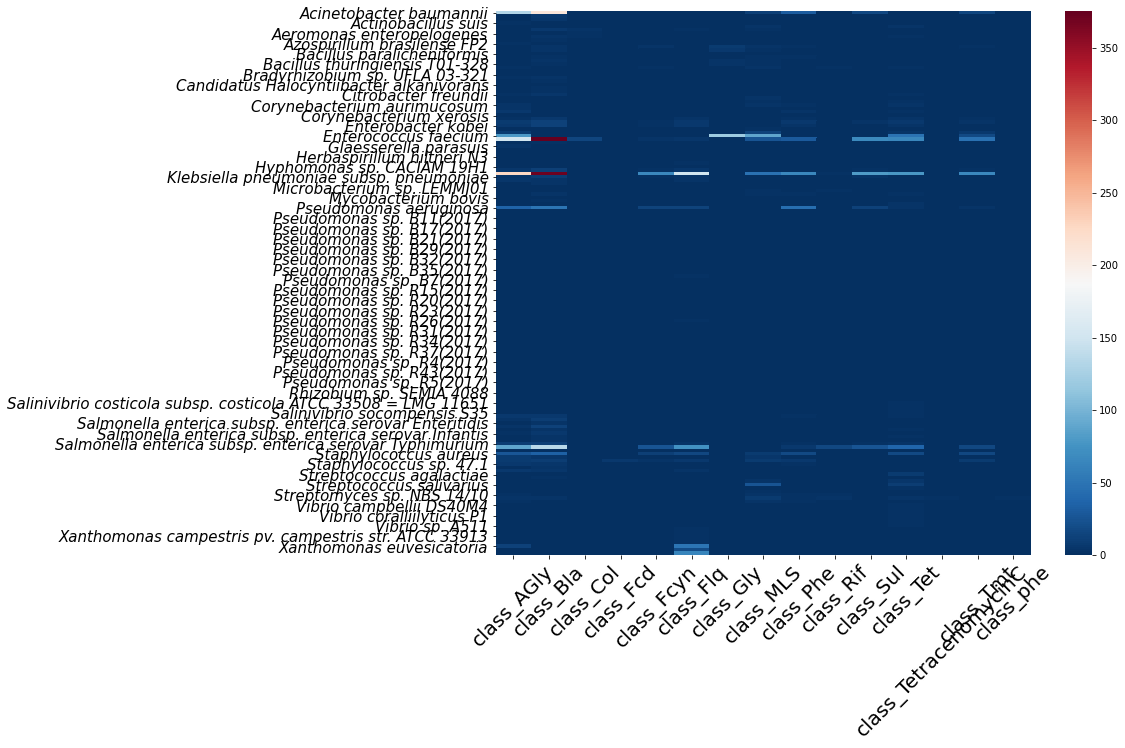

In [41]:
#ARG-Annot data
plt.figure(figsize = (12,10))
sns.heatmap(profile, cmap = "RdBu_r")
plt.colormaps()
plt.xticks(fontsize = 20, rotation = 45)
plt.yticks(fontsize = 15, fontstyle = 'italic')
plt.ylabel('')
#plt.savefig('heatmapmap_classes_argannot.png', bbox_inches = 'tight',dpi = 600)

## Retirar genomas para construção de filogenias

## Sets

## Diagrama de Veen: procurar por elementos moveis

## Encontrar plasmídeos

# Co-ocorrência entre patôgenos humanos e não humanos (ou bactérias de vida livre)
<p>
    Alguns estudos mostraram que bactérias patogênicas que não infectam humanos ou, ainda, as não potogênicas são potênciais reservatorórios de ARGs devido ao contato com antibióticos fora da área médica. <br /> 
    <b>Objetivo:</b> encontrar espécies de interesse clínico e checar se elas compartilham genes de resistência com grupos não patogênicos ou patogênos de outros animais/plantas.<br />
    <br />
<b>Lista de interesse: patôgenos ESKAPE +  E.coli</b>  
    <ul>
        <li> Enterococcus faecium   [Presente] </li>
        <li> Staphylococcus aureus  [Presente] </li>
        <li> Klebsiella pneumoniae  [Presente]</li>
        <li> Acinetobacter baumannii[Presente]</li>
        <li> Pseudomonas aeruginosa [Presente]</li>
        <li> Enterobacter spp       [Presente :cloacae, kobei e  hormaechei]</li>
        <li> Escherichia coli       [Presente]</li>
    </ul>
    
</p>

[ESKAPE](https://en.wikipedia.org/wiki/ESKAPE)

# **Passo 1:** selecionar os patôgenos humanos de interesse

In [12]:
#lista de patôgenos de interesse
eskape = ['Enterococcus faecium',
          'Staphylococcus aureus',
          'Klebsiella pneumoniae',
          'Acinetobacter baumannii',
          'Pseudomonas aeruginosa',
          'Enterobacter cloacae',
          'Enterobacter kobei',
          'Enterobacter hormaechei',
          'Escherichia coli']

#A MAIORIA DOS GENOMAS DE BACTÉRIAS DE VIDA LIVE NÃO POSSUI AS COORDENADAS

# **Passo 1.1:** limpar o banco de dados. Deixar apenas aqueles genomas com dados de coleta completos

In [13]:
args_spread = argannot[['gene','coordenates','colection_date','country','file','sequence','strand','start','end','organism','plasmid','class','host']].query("coordenates != 'Na'").query("colection_date != 'Na' ").query("country != 'Na'")
args_spread = args_spread.set_index('country').filter(like = 'Brazil',axis = 0)
args_spread["year"] = pd.to_datetime(args_spread.colection_date.values).year
args_spread.colection_date  = args_spread.colection_date.apply(lambda x: customfunc.SwitchMonths(x))
customfunc.SplitCoords(args_spread,"lat")
args_spread['lat'] = args_spread.lat.apply(lambda x: customfunc.NumCoord(x))
customfunc.SplitCoords(args_spread,"lon")
args_spread['lon'] = args_spread.lon.apply(lambda x: customfunc.NumCoord(x))
args_spread.head()

,gene,coordenates,colection_date,file,sequence,strand,start,end,organism,plasmid,class,host,year,lat,lon
country,,,,,,,,,,,,,,,
Brazil,(AGly)aac(3)-IIIc,3.7632 S 49.6836 W,21/10/2011,GCA_000503195.1_CACIA14H2Blastomonas_genomic.gbff,AYSC01000016,-,31420,32168,Blastomonas sp. CACIA14H2,Na,AGly,Na,2011,-3.76320,-49.68360
Brazil: Parana,(Col)mcr-7.1,25.42778 S 49.27306 W,1999,GCA_000687355.2_ASM68735v2_genomic.gbff,JMGO02000002,-,484240,485798,Aeromonas enteropelogenes,Na,Col,Homo sapiens,1999,-25.42778,-49.27306
Brazil: Parana,(Bla)blaTRU-1,25.42778 S 49.27306 W,1999,GCA_000687355.2_ASM68735v2_genomic.gbff,JMGO02000003,-,605273,606421,Aeromonas enteropelogenes,Na,Bla,Homo sapiens,1999,-25.42778,-49.27306
Brazil: Parana,(Col)mcr-7.1,25.42778 S 49.27306 W,1999,GCA_000687355.2_ASM68735v2_genomic.gbff,JMGO02000018,-,227152,228724,Aeromonas enteropelogenes,Na,Col,Homo sapiens,1999,-25.42778,-49.27306
Brazil: Curitiba,(Bla)blaMOX-6,25.4455 S 49.2393 W,17/12/2010,GCA_000959705.2_ASM95970v2_genomic.gbff,CP024198,+,1164689,1165840,Aeromonas caviae,Na,Bla,Homo sapiens,2010,-25.44550,-49.23930


**Quais ARGs aparecem mais?**

In [14]:
#info sobre args_spread
print(f"Total de {len(args_spread)} ARGs coletados com coordenadas. {len(set(args_spread.gene))} distintos")

Total de 1603 ARGs coletados com coordenadas. 253 distintos


# **Passo 2:** encontrar ARGs presentes nos patógenos ESKAPE dos nossos genomas. 

In [15]:
ente_fae = args_spread.query(f"organism == 'Enterococcus faecium'")
len(ente_fae)

60

In [16]:
stap_au = args_spread.query(f"organism == 'Staphylococcus aureus'")
len(stap_au)

70

In [17]:
kleb_pneu = args_spread.query(f"organism == 'Klebsiella pneumoniae'")
len(kleb_pneu)

278

In [18]:
aci_bau = args_spread.query("organism == 'Acinetobacter baumannii'")
len(aci_bau)

31

In [19]:
pseu_ae = args_spread.query("organism == 'Pseudomonas aeruginosa'")
len(pseu_ae)

34

In [20]:
ent_clo = args_spread.query("organism == 'Enterobacter cloacae'")
len(ent_clo)

22

In [21]:
ent_ko = args_spread.query("organism == 'Enterobacter kobei'")
len(ent_ko)

36

In [22]:
e_coli = args_spread.query("organism == 'Escherichia coli'")
len(e_coli)

630

# **Passo 3:** checar a existência desses mesmos ARGs em bactérias ambientais

<p style='text-align: justify;'> 
    Como pesquisar a movimentação dos ARGs pelo território nacional?<br />
    Preciso unir das informações: ano de coleta da amostra, coordenada e linhagens onde esses ARGs aparecem. <br />
    Figura resultante: um mapa do Brasil com grafo sobreposto.
</p>

In [23]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

/home/tiago/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/tiago/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/home/tiago/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/tiago/anaconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame(

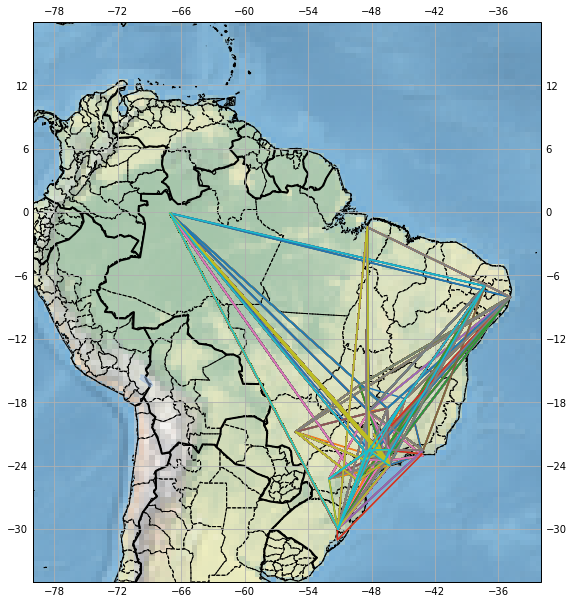

In [24]:
## MAPA DE E.COLI 

#Cria Objeto Figura
fig = plt.figure(figsize = (20,20))
#add plot ao obj figura
ax1 = fig.add_subplot(121, projection=ccrs.PlateCarree())
ax1.stock_img()
ax1.set_extent([-80, -32, -35, 18], crs=ccrs.PlateCarree())
#Add features ao mapa
ax1.add_feature(cfeature.LAND)
ax1.add_feature(cfeature.STATES.with_scale('10m'),linestyle='--')
ax1.add_feature(cfeature.OCEAN)
ax1.add_feature(cfeature.COASTLINE)
ax1.add_feature(cfeature.BORDERS, linestyle='-', linewidth = 2)
ax1.add_feature(cfeature.LAKES, alpha=0.5)
ax1.gridlines(draw_labels=True)

#Adicionar os genes
for c in e_coli.itertuples():
    plt.plot(args_spread.query(f"gene == '{c.gene}'").sort_values("year").lon,
             args_spread.query(f"gene == '{c.gene}'").sort_values("year").lat)

/home/tiago/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/tiago/anaconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)
/home/tiago/anaconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any param

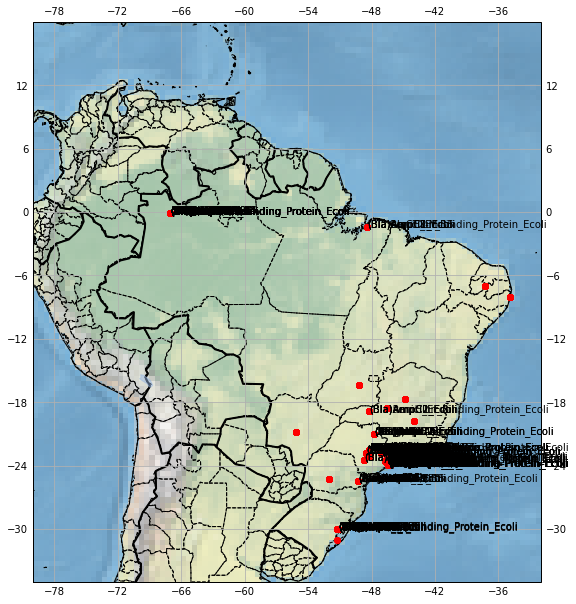

In [25]:
## MAPA DE E.COLI 

#Cria Objeto Figura
fig = plt.figure(figsize = (20,20))
#add plot ao obj figura
ax1 = fig.add_subplot(121, projection=ccrs.PlateCarree())
ax1.stock_img()
ax1.set_extent([-80, -32, -35, 18], crs=ccrs.PlateCarree())
#Add features ao mapa
ax1.add_feature(cfeature.LAND)
ax1.add_feature(cfeature.STATES.with_scale('10m'),linestyle='--')
ax1.add_feature(cfeature.OCEAN)
ax1.add_feature(cfeature.COASTLINE)
ax1.add_feature(cfeature.BORDERS, linestyle='-', linewidth = 2)
ax1.add_feature(cfeature.LAKES, alpha=0.5)
ax1.gridlines(draw_labels=True)

#Adicionar os genes
for c in e_coli.itertuples():
    plt.plot(args_spread.query(f"gene == '{c.gene}'").sort_values("year").lon,
             args_spread.query(f"gene == '{c.gene}'").sort_values("year").lat,
             linewidth = 1,
             linestyle = '',
             color  = 'r',
             marker = 'o',
             transform = ccrs.Geodetic())
    plt.text(c.lon, c.lat, c.gene)

/home/tiago/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/tiago/anaconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)
/home/tiago/anaconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any param

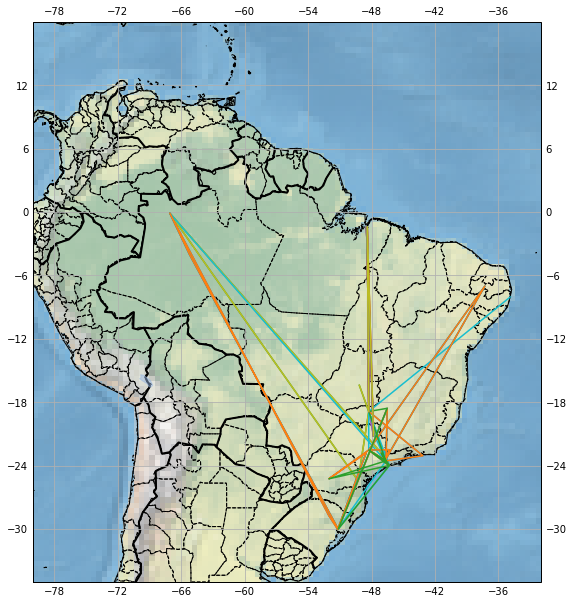

In [26]:
## MAPA DE ENTEROCOCCUS FAECIUM

#Cria Objeto Figura
fig = plt.figure(figsize = (20,20))
#add plot ao obj figura
ax1 = fig.add_subplot(121, projection=ccrs.PlateCarree())
ax1.stock_img()
ax1.set_extent([-80, -32, -35, 18], crs=ccrs.PlateCarree())
#Add features ao mapa
ax1.add_feature(cfeature.LAND)
ax1.add_feature(cfeature.STATES.with_scale('10m'),linestyle='--')
ax1.add_feature(cfeature.OCEAN)
ax1.add_feature(cfeature.COASTLINE)
ax1.add_feature(cfeature.BORDERS, linestyle='-', linewidth = 2)
ax1.add_feature(cfeature.LAKES, alpha=0.5)
ax1.gridlines(draw_labels=True)

#Adicionar os genes
for c in aci_bau.itertuples():
    plt.plot(args_spread.query(f"gene == '{c.gene}'").sort_values("year").lon,
             args_spread.query(f"gene == '{c.gene}'").sort_values("year").lat,
             transform = ccrs.Geodetic())

# Procurar onde os patôgenos ESKAPE estão

/home/tiago/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/tiago/anaconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)
/home/tiago/anaconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any param

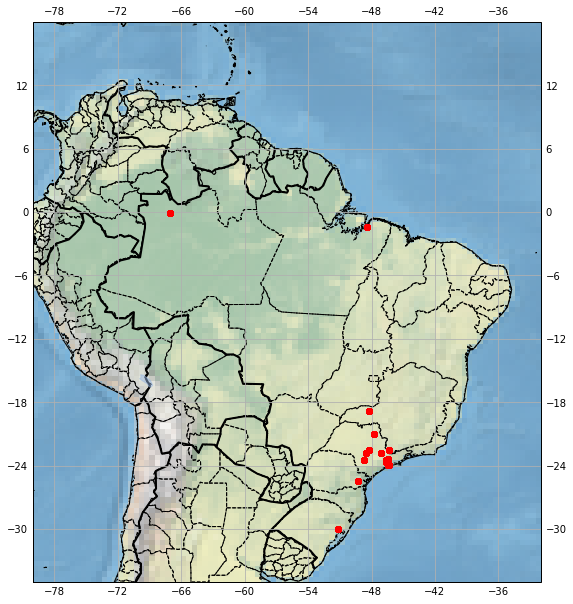

In [27]:
#Cria Objeto Figura
fig = plt.figure(figsize = (20,20))
#add plot ao obj figura
ax1 = fig.add_subplot(121, projection=ccrs.PlateCarree())
ax1.stock_img()
ax1.set_extent([-80, -32, -35, 18], crs=ccrs.PlateCarree())
#Add features ao mapa
ax1.add_feature(cfeature.LAND)
ax1.add_feature(cfeature.STATES.with_scale('10m'),linestyle='--')
ax1.add_feature(cfeature.OCEAN)
ax1.add_feature(cfeature.COASTLINE)
ax1.add_feature(cfeature.BORDERS, linestyle='-', linewidth = 2)
ax1.add_feature(cfeature.LAKES, alpha=0.5)
ax1.gridlines(draw_labels=True)

#Adicionar os genes
for c in aci_bau.itertuples():
    plt.plot(args_spread.query("organism == 'Escherichia coli'").sort_values("year").lon,
             args_spread.query("organism == 'Escherichia coli'").sort_values("year").lat,
             linewidth = 1,
             linestyle = '',
             color  = 'r',
             marker = 'o',
             transform = ccrs.Geodetic())

/home/tiago/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/tiago/anaconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)
/home/tiago/anaconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any param

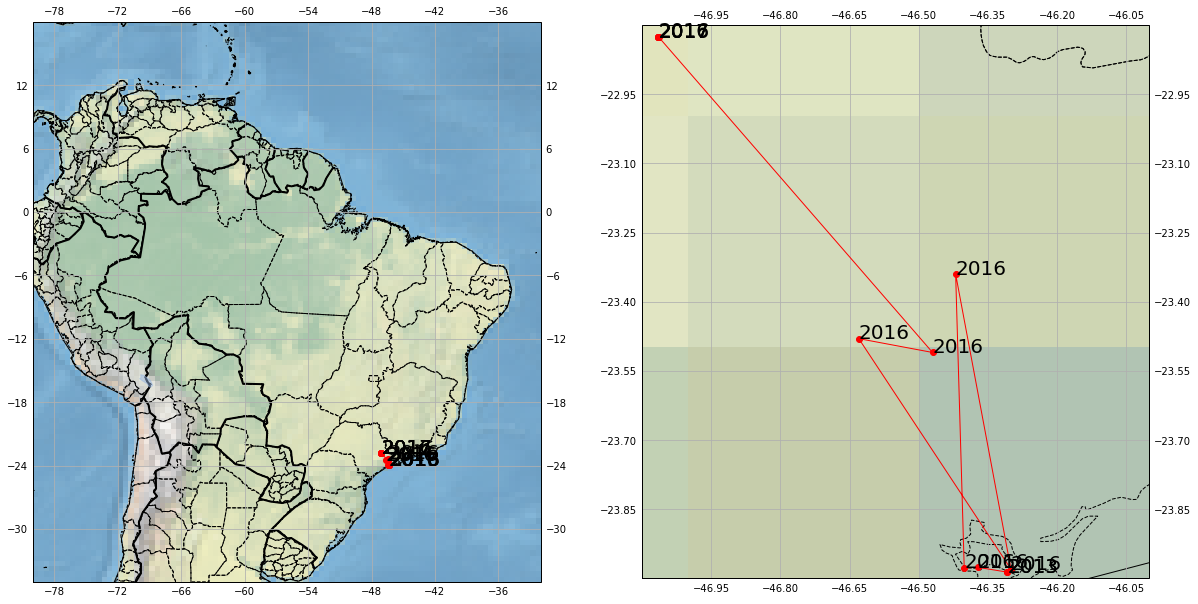

In [28]:
#Cria Objeto Figura
fig = plt.figure(figsize = (20,20))
#add plot ao obj figura
ax1 = fig.add_subplot(121, projection=ccrs.PlateCarree())
ax1.stock_img()
ax1.set_extent([-80, -32, -35, 18], crs=ccrs.PlateCarree())
#Add features ao mapa
ax1.add_feature(cfeature.LAND)
ax1.add_feature(cfeature.STATES.with_scale('10m'),linestyle='--')
ax1.add_feature(cfeature.OCEAN)
ax1.add_feature(cfeature.COASTLINE)
ax1.add_feature(cfeature.BORDERS, linestyle='-', linewidth = 2)
ax1.add_feature(cfeature.LAKES, alpha=0.5)
ax1.gridlines(draw_labels=True)




#Add pontos e linhas ao mapa
plt.plot(args_spread.query("gene == '(Col)mcr-1.1'").sort_values("year").lon,
         args_spread.query("gene == '(Col)mcr-1.1'").sort_values("year").lat,
         linewidth = 1,
         linestyle = '--',
         color  = 'r',
         marker = 'o',
         transform = ccrs.Geodetic())
#Add ano de coleta ao mapa
for date in args_spread.query("gene == '(Col)mcr-1.1'").sort_values("year").itertuples():
    plt.text(date.lon, 
             date.lat, 
             date.year, 
             transform = ccrs.Geodetic(),
             horizontalalignment = 'left',
             fontsize = 20)

    
    
    
#Zoom
ax2 = fig.add_subplot(122, projection=ccrs.PlateCarree())
ax2.stock_img()
ax2.set_extent([-47.1,-46,-24,-22.8], crs=ccrs.PlateCarree())
#Add features ao mapa
ax2.add_feature(cfeature.LAND)
ax2.add_feature(cfeature.STATES.with_scale('10m'),linestyle='--')
ax2.add_feature(cfeature.OCEAN)
ax2.add_feature(cfeature.COASTLINE)
ax2.add_feature(cfeature.BORDERS, linestyle='-', linewidth = 2)
ax2.add_feature(cfeature.LAKES, alpha=0.5)
ax2.gridlines(draw_labels=True)

#Add pontos e linhas ao mapa
plt.plot(args_spread.query("gene == '(Col)mcr-1.1'").sort_values("year").lon,
         args_spread.query("gene == '(Col)mcr-1.1'").sort_values("year").lat,
         linewidth = 1,
         linestyle = '-',
         color  = 'r',
         marker = 'o',
         transform = ccrs.Geodetic())

#Add ano de coleta ao mapa
for date in args_spread.query("gene == '(Col)mcr-1.1'").sort_values("year").itertuples():
    plt.text(date.lon, 
             date.lat, 
             date.year, 
             transform = ccrs.Geodetic(),
             horizontalalignment = 'left',
             fontsize = 20)    
#plt.savefig("mcr1-1.png", dpi = 200)
#plt.show()


# Flash talks 18/09/2020

/home/tiago/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'for dados in args_spread.set_index("organism").filter(like = \'Klebsiella\', axis = 0).filter(like = \'002304205.1\', axis = 0).sort_values("year").itertuples():\n    plt.text(dados.lon, \n             dados.lat,\n             dados.coordenates,\n             transform = ccrs.Geodetic(),\n             horizontalalignment = \'left\',\n             fontsize = 10)'

/home/tiago/anaconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)
/home/tiago/anaconda3/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


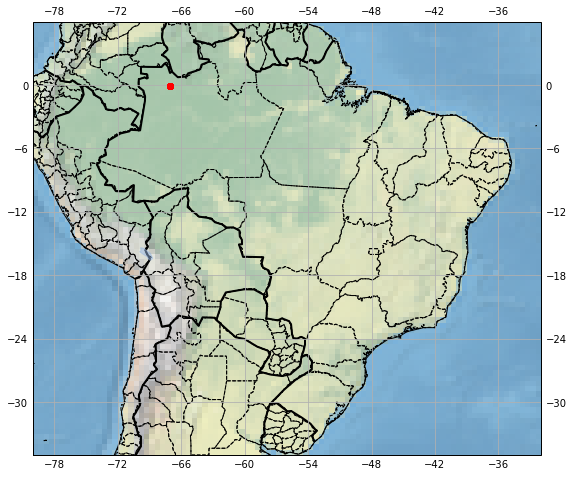

In [29]:
#Cria Objeto Figura
fig = plt.figure(figsize = (20,20))
#add plot ao obj figura
ax1 = fig.add_subplot(121, projection=ccrs.PlateCarree())
ax1.stock_img()
ax1.set_extent([-80, -32, -35, 6], crs=ccrs.PlateCarree())
#Add features ao mapa
ax1.add_feature(cfeature.LAND)
ax1.add_feature(cfeature.STATES.with_scale('10m'),linestyle='--')
ax1.add_feature(cfeature.OCEAN)
ax1.add_feature(cfeature.COASTLINE)
ax1.add_feature(cfeature.BORDERS, linestyle='-', linewidth = 2)
ax1.add_feature(cfeature.LAKES, alpha=0.5)
ax1.gridlines(draw_labels=True)

#Adicionar os genes
plt.plot(args_spread.set_index("file").filter(like = '001982515.1', axis = 0).lon,
         args_spread.set_index("file").filter(like = '001982515.1', axis = 0).lat,
         linestyle = '',
         marker = 'o', 
         color = 'r',
         transform = ccrs.Geodetic())
#Adicionar ano
"""for dados in args_spread.set_index("organism").filter(like = 'Klebsiella', axis = 0).filter(like = '002304205.1', axis = 0).sort_values("year").itertuples():
    plt.text(dados.lon, 
             dados.lat,
             dados.coordenates,
             transform = ccrs.Geodetic(),
             horizontalalignment = 'left',
             fontsize = 10)"""
#plt.savefig("/home/tiago/documentos/github/ARG-Sentinel/Klebsiella_br/figuras//map_Kpneumoniae_br.png",dpi = 400)

In [30]:
kleb_spread_classes = args_spread.set_index("organism").filter(like = "Klebsiella", axis = 0)[['file','class']].set_index("file")
kleb_spread_classes_dummies = pd.get_dummies(kleb_spread_classes).groupby(level = 0).sum()
kleb_spread_classes_dummies

/home/tiago/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,class_AGly,class_Bla,class_Col,class_Fcyn,class_Flq,class_MLS,class_Phe,class_Rif,class_Sul,class_Tet,class_Tmt
file,,,,,,,,,,,
GCA_001645745.1_ASM164574v1_genomic.gbff,0,4,0,1,2,0,0,0,2,0,0
GCA_002209465.1_ASM220946v1_genomic.gbff,0,4,0,1,2,0,0,0,0,0,0
GCA_002295145.1_ASM229514v1_genomic.gbff,3,5,0,1,2,0,1,0,2,0,1
GCA_002295185.1_ASM229518v1_genomic.gbff,2,6,0,1,3,1,1,1,1,0,0
GCA_002300775.1_ASM230077v1_genomic.gbff,2,6,0,1,2,0,0,0,0,0,0
GCA_003583875.1_ASM358387v1_genomic.gbff,5,4,1,1,3,0,1,0,1,1,0
GCA_003789125.1_ASM378912v1_genomic.gbff,1,6,0,1,2,1,1,0,1,2,1
GCF_001649605.2_ASM164960v2_genomic.gbff,1,5,0,1,2,0,0,0,1,0,1
GCF_001718115.1_ASM171811v1_genomic.gbff,8,6,0,1,3,0,1,1,2,1,3


/home/tiago/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


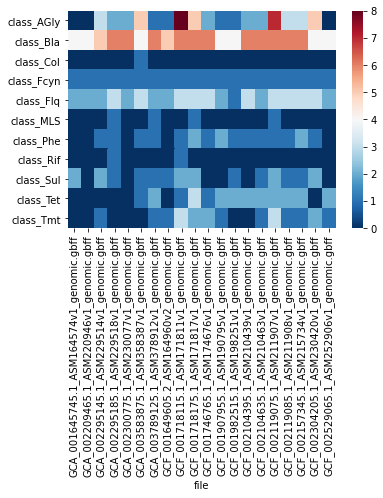

In [31]:
sns.heatmap(kleb_spread_classes_dummies.T, cmap = "RdBu_r")
plt.savefig("/home/tiago/documentos/github/ARG-Sentinel/Klebsiella_br/figuras/heatmap_kpneu_br_class.png")

In [32]:
kleb_spread_bla = args_spread.set_index("organism").filter(like = "Klebsiella", axis = 0)[['file','gene']].set_index("file").sort_values('gene')
kleb_spread_bla_dummies = pd.get_dummies(kleb_spread_bla).groupby(level = 0).sum()
kleb_spread_bla_dummies.shape

/home/tiago/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(20, 65)

/home/tiago/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


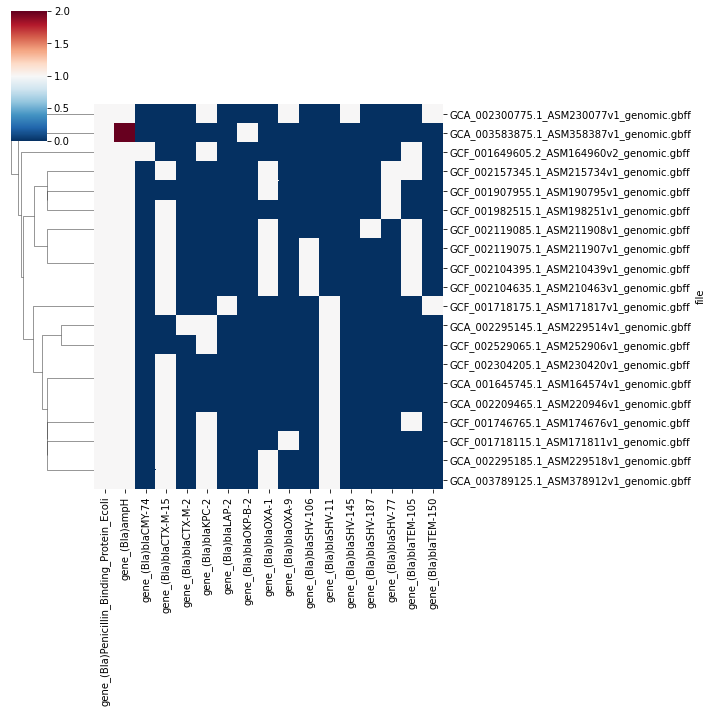

In [33]:
sns.clustermap(kleb_spread_bla_dummies.filter(like = '(Bla)', axis = 1), cmap = "RdBu_r", col_cluster=False)
plt.savefig("/home/tiago/documentos/github/ARG-Sentinel/Klebsiella_br/figuras/clustermap_kpneu_br.png",dpi = 300)

In [34]:
kpneu_genomes = pd.Series(glob.glob("/home/tiago/documentos/github/ARG-Sentinel/Klebsiella_br/*.fasta"))
kpneu_genomes = list(kpneu_genomes.apply(lambda x: x.split("/")[-1].split(".f")[0]))

/home/tiago/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
used = []
fasta = open("ctxm15_i50_extended.fasta","w")
for genomes in args_spread.set_index("file").loc[kpneu_genomes,].query("gene == '(Bla)blaCTX-M-15'").itertuples():
    if genomes.Index not in used:
        used.append(genomes.Index)
        for files in SeqIO.parse(f"/home/tiago/documentos/sentinel/genomasbrasil/{genomes.Index}","genbank"):
            if genomes.sequence == files.id.split('.')[0]:
                fasta.write(f">{genomes.Index}.fasta\n")
                if genomes.strand == "+":
                    fasta.write(f"{files.seq[genomes.start-2000:genomes.end+2000]}\n")
                else:
                    fasta.write(f"{files.seq[genomes.start-2000:genomes.end+2000].reverse_complement()}\n")
            else:
                pass
    else:
        pass
fasta.close()

/home/tiago/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
set(args_spread.set_index("file").loc[kpneu_genomes].query("gene == '(Bla)blaCTX-M-15'")['sequence'].values) & set(plasmidfinder["sequence"])

/home/tiago/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'NZ_NCVX01000054'}

In [37]:
args_spread.set_index("file").loc[kpneu_genomes].query("gene == '(Bla)blaCTX-M-15'")[['lon','lat','year']].to_csv("coordates.csv")

/home/tiago/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
for f in SeqIO.parse("/home/tiago/documentos/sentinel/genomasbrasil/GCF_002104635.1_ASM210463v1_genomic.gbff","genbank"):
    if f.id == 'NZ_NCVX01000054':
        print(repr(f.id))

/home/tiago/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
args_spread

/home/tiago/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,gene,coordenates,colection_date,file,sequence,strand,start,end,organism,plasmid,class,host,year,lat,lon
country,,,,,,,,,,,,,,,
Brazil,(AGly)aac(3)-IIIc,3.7632 S 49.6836 W,21/10/2011,GCA_000503195.1_CACIA14H2Blastomonas_genomic.gbff,AYSC01000016,-,31420,32168,Blastomonas sp. CACIA14H2,Na,AGly,Na,2011,-3.76320,-49.68360
Brazil: Parana,(Col)mcr-7.1,25.42778 S 49.27306 W,1999,GCA_000687355.2_ASM68735v2_genomic.gbff,JMGO02000002,-,484240,485798,Aeromonas enteropelogenes,Na,Col,Homo sapiens,1999,-25.42778,-49.27306
Brazil: Parana,(Bla)blaTRU-1,25.42778 S 49.27306 W,1999,GCA_000687355.2_ASM68735v2_genomic.gbff,JMGO02000003,-,605273,606421,Aeromonas enteropelogenes,Na,Bla,Homo sapiens,1999,-25.42778,-49.27306
Brazil: Parana,(Col)mcr-7.1,25.42778 S 49.27306 W,1999,GCA_000687355.2_ASM68735v2_genomic.gbff,JMGO02000018,-,227152,228724,Aeromonas enteropelogenes,Na,Col,Homo sapiens,1999,-25.42778,-49.27306
Brazil: Curitiba,(Bla)blaMOX-6,25.4455 S 49.2393 W,17/12/2010,GCA_000959705.2_ASM95970v2_genomic.gbff,CP024198,+,1164689,1165840,Aeromonas caviae,Na,Bla,Homo sapiens,2010,-25.44550,-49.23930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Brazil,(Phe)dha1,20.7796 S 42.8617 W,2015,GCF_005153305.1_ASM515330v1_genomic.gbff,NZ_CP039848,+,243129,244316,Staphylococcus aureus,Na,Phe,Bos taurus,2015,-20.77960,-42.86170
Brazil,(AGly)apH-Stph,20.7796 S 42.8617 W,2015,GCF_005153305.1_ASM515330v1_genomic.gbff,NZ_CP039848,+,921377,922177,Staphylococcus aureus,Na,AGly,Bos taurus,2015,-20.77960,-42.86170
Brazil,(Tmt)dfrC,20.7796 S 42.8617 W,2015,GCF_005153305.1_ASM515330v1_genomic.gbff,NZ_CP039848,+,1284391,1284867,Staphylococcus aureus,Na,Tmt,Bos taurus,2015,-20.77960,-42.86170


In [40]:
len(set(args_spread.file))

/home/tiago/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


213